In [1]:
import pandas as pd
import numpy as np

# Make numpy values easier to read.
np.set_printoptions(precision=3, suppress=True)

import tensorflow as tf
from tensorflow.keras import layers

In memory data
For any small CSV dataset the simplest way to train a TensorFlow model on it is to load it into memory as a pandas DataFrame or a NumPy array.

A relatively simple example is the abalone dataset.

The dataset is small.
All the input features are limited-range floating point values.
Here is how to download the data into a DataFrame:

In [16]:
abalone_data = pd.read_csv(
    "https://storage.googleapis.com/download.tensorflow.org/data/abalone_train.csv",
    names=["Length", "Diameter", "Height", "Whole weight", "Shucked weight",
           "Viscera weight", "Shell weight", "Age"])

abalone_data.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age
0,0.435,0.335,0.110,0.334,0.1355,0.0775,0.0965,7
1,0.585,0.450,0.125,0.874,0.3545,0.2075,0.2250,6
2,0.655,0.510,0.160,1.092,0.3960,0.2825,0.3700,14
3,0.545,0.425,0.125,0.768,0.2940,0.1495,0.2600,16
4,0.545,0.420,0.130,0.879,0.3740,0.1695,0.2300,13


The nominal task for this dataset is to predict the age from the other measurements, so separate the features and labels for training:

In [17]:
abalone_features = abalone_data.copy()

In [18]:
abalone_features.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age
0,0.435,0.335,0.110,0.334,0.1355,0.0775,0.0965,7
1,0.585,0.450,0.125,0.874,0.3545,0.2075,0.2250,6
2,0.655,0.510,0.160,1.092,0.3960,0.2825,0.3700,14
3,0.545,0.425,0.125,0.768,0.2940,0.1495,0.2600,16
4,0.545,0.420,0.130,0.879,0.3740,0.1695,0.2300,13


In [19]:
abalone_train = abalone_features.drop('Age',axis=1)

In [20]:
abalone_train.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
0,0.435,0.335,0.110,0.334,0.1355,0.0775,0.0965
1,0.585,0.450,0.125,0.874,0.3545,0.2075,0.2250
2,0.655,0.510,0.160,1.092,0.3960,0.2825,0.3700
3,0.545,0.425,0.125,0.768,0.2940,0.1495,0.2600
4,0.545,0.420,0.130,0.879,0.3740,0.1695,0.2300


In [21]:

abalone_labels = abalone_features.pop('Age')

In [22]:
abalone_labels.head()

0     7
1     6
2    14
3    16
4    13
Name: Age, dtype: int64

In [23]:
abalone_train = np.array(abalone_train)
abalone_train

array([[0.435, 0.335, 0.11 , ..., 0.136, 0.077, 0.097],
       [0.585, 0.45 , 0.125, ..., 0.354, 0.207, 0.225],
       [0.655, 0.51 , 0.16 , ..., 0.396, 0.282, 0.37 ],
       ...,
       [0.53 , 0.42 , 0.13 , ..., 0.374, 0.167, 0.249],
       [0.395, 0.315, 0.105, ..., 0.118, 0.091, 0.119],
       [0.45 , 0.355, 0.12 , ..., 0.115, 0.067, 0.16 ]])

In [24]:
abalone_model = tf.keras.Sequential([
  layers.Dense(64, activation='relu'),
  layers.Dense(1)
])

abalone_model.compile(loss = tf.keras.losses.MeanSquaredError(),
                      optimizer = tf.keras.optimizers.Adam())

In [ ]:
abalone_model.fit(abalone_train, abalone_labels, epochs=10) #, metrics=['accuracy']

Epoch 1/10
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 6.5887
Epoch 2/10
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 6.5996
Epoch 3/10
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 6.2122
Epoch 4/10
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 6.1487
Epoch 5/10
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 993us/step - loss: 6.2288
Epoch 6/10
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 6.2159
Epoch 7/10
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 5.9157
Epoch 8/10
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.4470
Epoch 9/10
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 5.7114
Epoch 10/10
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 5.4951


Basic preprocessing
It's good practice to normalize the inputs to your model. The Keras preprocessing layers provide a convenient way to build this normalization into your model.

The tf.keras.layers.Normalization layer precomputes the mean and variance of each column, and uses these to normalize the data.

In [26]:
normalize = layers.Normalization()

In [31]:
normalize.adapt(abalone_train)

In [ ]:
norm_abalone_model = tf.keras.Sequential([
  normalize,
  layers.Dense(64, activation='relu'),
  layers.Dense(1)
])

norm_abalone_model.compile(loss = tf.keras.losses.MeanSquaredError(),
                           optimizer = tf.keras.optimizers.Adam())

norm_abalone_model.fit(abalone_train, abalone_labels, epochs=10)

Epoch 1/10
104/104 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 88.6611
Epoch 2/10
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 41.5392
Epoch 3/10
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 28.8929
Epoch 4/10
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 21.3454
Epoch 5/10
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 11.3189
Epoch 6/10
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7.1883
Epoch 7/10
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6.8698
Epoch 8/10
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 994us/step - loss: 5.9705
Epoch 9/10
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 6.2741
Epoch 10/10
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 5.5837


titanik


Mixed data types
In the previous sections, you worked with a dataset where all the features were limited-range floating point values. But not all datasets are limited to a single data type.

The "Titanic" dataset contains information about the passengers on the Titanic. The nominal task on this dataset is to predict who survived.

In [33]:
titanic = pd.read_csv("https://storage.googleapis.com/tf-datasets/titanic/train.csv")
titanic.head()

,survived,sex,age,n_siblings_spouses,parch,fare,class,deck,embark_town,alone
0,0,male,22.0,1,0,7.2500,Third,unknown,Southampton,n
1,1,female,38.0,1,0,71.2833,First,C,Cherbourg,n
2,1,female,26.0,0,0,7.9250,Third,unknown,Southampton,y
3,1,female,35.0,1,0,53.1000,First,C,Southampton,n
4,0,male,28.0,0,0,8.4583,Third,unknown,Queenstown,y


In [34]:
titanic_features = titanic.copy()
titanic_labels = titanic_features.pop('survived')

Because of the different data types and ranges, you can't simply stack the features into a NumPy array and pass it to a tf.keras.Sequential model. Each column needs to be handled individually.

As one option, you could preprocess your data offline (using any tool you like) to convert categorical columns to numeric columns, then pass the processed output to your TensorFlow model. The disadvantage to that approach is that if you save and export your model the preprocessing is not saved with it. The Keras preprocessing layers avoid this problem because they're part of the model.

In [ ]:
# Create a symbolic input
input = tf.keras.Input(shape=(), dtype=tf.float32)

# Perform a calculation using the input
result = 2*input + 1 # y = mx +c

# the result doesn't have a value
result

<KerasTensor shape=(None,), dtype=float32, sparse=False, name=keras_tensor_9>

In [38]:
input

<KerasTensor shape=(None,), dtype=float32, sparse=False, name=keras_tensor_7>

In [36]:
calc = tf.keras.Model(inputs=input, outputs=result)

In [39]:
calc

<Functional name=functional_2, built=True>

In [37]:
print(calc(np.array([1])).numpy())
print(calc(np.array([2])).numpy())

[3.]
[5.]


In [44]:
next(iter(titanic_features.items()))

('sex',
 0        male
 1      female
 2      female
 3      female
 4        male
         ...  
 622      male
 623      male
 624    female
 625    female
 626      male
 Name: sex, Length: 627, dtype: object)

In [45]:
next(iter(titanic_features.items()))

('sex',
 0        male
 1      female
 2      female
 3      female
 4        male
         ...  
 622      male
 623      male
 624    female
 625    female
 626      male
 Name: sex, Length: 627, dtype: object)

This line creates a Keras input layer and adds it to the inputs dictionary:
Code Breakdown
tf.keras.Input(): Creates a Keras input layer.
shape=(1,): Specifies the input shape (scalar value).
name=name: Assigns a name to the input layer.
dtype=dtype: Specifies the data type (e.g., float32, int32).
inputs[name] = ...: Adds the input layer to the inputs dictionary.

In [ ]:
inputs = {}

for name, column in titanic_features.items():
  dtype = column.dtype
  if dtype == object:
    dtype = tf.string
  else:
    dtype = tf.float32

  inputs[name] = tf.keras.Input(shape=(1,), name=name, dtype=dtype)

inputs

{'sex': <KerasTensor shape=(None, 1), dtype=string, sparse=False, name=sex>,
 'age': <KerasTensor shape=(None, 1), dtype=float32, sparse=False, name=age>,
 'n_siblings_spouses': <KerasTensor shape=(None, 1), dtype=float32, sparse=False, name=n_siblings_spouses>,
 'parch': <KerasTensor shape=(None, 1), dtype=float32, sparse=False, name=parch>,
 'fare': <KerasTensor shape=(None, 1), dtype=float32, sparse=False, name=fare>,
 'class': <KerasTensor shape=(None, 1), dtype=string, sparse=False, name=class>,
 'deck': <KerasTensor shape=(None, 1), dtype=string, sparse=False, name=deck>,
 'embark_town': <KerasTensor shape=(None, 1), dtype=string, sparse=False, name=embark_town>,
 'alone': <KerasTensor shape=(None, 1), dtype=string, sparse=False, name=alone>}

In [ ]:
# import tensorflow as tf

# inputs = {}
# dtype = tf.float32

# # Create input layers for 'age' and 'height'
# for name in ['age', 'height']:
#     inputs[name] = tf.keras.Input(shape=(1,), name=name, dtype=dtype)

# print(inputs)
# # Output: {'age': <KerasTensor>, 'height': <KerasTensor>}

In [ ]:
titanic_features['class'].dtype #object

dtype('O')

In [47]:
inputs['class'].dtype

'string'

The first step in your preprocessing logic is to concatenate the numeric inputs together, and run them through a normalization layer:

In [48]:
numeric_inputs = {name:input for name,input in inputs.items()
                  if input.dtype==tf.float32}

In [49]:
numeric_inputs

{'age': <KerasTensor shape=(None, 1), dtype=float32, sparse=False, name=age>,
 'n_siblings_spouses': <KerasTensor shape=(None, 1), dtype=float32, sparse=False, name=n_siblings_spouses>,
 'parch': <KerasTensor shape=(None, 1), dtype=float32, sparse=False, name=parch>,
 'fare': <KerasTensor shape=(None, 1), dtype=float32, sparse=False, name=fare>}

In [54]:
numeric_inputs.values()

dict_values([<KerasTensor shape=(None, 1), dtype=float32, sparse=False, name=age>, <KerasTensor shape=(None, 1), dtype=float32, sparse=False, name=n_siblings_spouses>, <KerasTensor shape=(None, 1), dtype=float32, sparse=False, name=parch>, <KerasTensor shape=(None, 1), dtype=float32, sparse=False, name=fare>])

In [50]:

categorical_inputs = {name:input for name,input in inputs.items() 
                      if input.dtype == tf.string}

In [51]:
categorical_inputs

{'sex': <KerasTensor shape=(None, 1), dtype=string, sparse=False, name=sex>,
 'class': <KerasTensor shape=(None, 1), dtype=string, sparse=False, name=class>,
 'deck': <KerasTensor shape=(None, 1), dtype=string, sparse=False, name=deck>,
 'embark_town': <KerasTensor shape=(None, 1), dtype=string, sparse=False, name=embark_town>,
 'alone': <KerasTensor shape=(None, 1), dtype=string, sparse=False, name=alone>}

This line of code concatenates multiple numeric input features into a single tensor using the Keras Concatenate layer:
Code Breakdown
numeric_inputs.values(): Extracts values from the numeric_inputs dictionary.
list(numeric_inputs.values()): Converts the dictionary values into a list.
layers.Concatenate(): Creates a Concatenate layer instance.
x = layers.Concatenate()(list(numeric_inputs.values())): Concatenates the input features along the last axis (axis=-1) and assigns the result to x.

In [52]:
x = layers.Concatenate()(list(numeric_inputs.values()))


In [ ]:
# numeric_inputs = {
#     'age': layers.Input(shape=(1,), name='age'),
#     'height': layers.Input(shape=(1,), name='height'),
#     'weight': layers.Input(shape=(1,), name='weight')
# }

# x = layers.Concatenate()(list(numeric_inputs.values()))
# print(x.shape)  # Output: (None, 3)

In [53]:
x

<KerasTensor shape=(None, 4), dtype=float32, sparse=False, name=keras_tensor_10>

In [55]:
norm = layers.Normalization()

In [56]:
norm

<Normalization name=normalization_1, built=False>

In [57]:

norm.adapt(np.array(titanic[numeric_inputs.keys()]))

In [ ]:
all_numeric_inputs = norm(x) # normalization for numerical inputs

all_numeric_inputs

<KerasTensor shape=(None, 4), dtype=float32, sparse=False, name=keras_tensor_12>

In [60]:
preprocessed_inputs = [all_numeric_inputs]

For the string inputs use the tf.keras.layers.StringLookup function to map from strings to integer indices in a vocabulary. Next, use tf.keras.layers.CategoryEncoding to convert the indexes into float32 data appropriate for the model.

In [ ]:
for name, input in inputs.items():
  if input.dtype == tf.float32:
    continue

  lookup = layers.StringLookup(vocabulary=np.unique(titanic_features[name]))
  one_hot = layers.CategoryEncoding(num_tokens=lookup.vocabulary_size())

  x = lookup(input)
  x = one_hot(x)
  preprocessed_inputs.append(x)

Creates a lookup table: Maps string values to integer indices.
Vocabulary: Set to unique values in titanic_features[name].
lookup.vocabulary_size(): Returns the number of unique strings.
CategoryEncoding Layer (One-Hot Encoding)
Converts integer indices to one-hot vectors.
num_tokens: Set to the vocabulary size from StringLookup.
Output shape: (batch_size, vocabulary_size).

With the collection of inputs and preprocessed_inputs, you can concatenate all the preprocessed inputs together, and build a model that handles the preprocessing:

In [62]:
preprocessed_inputs_cat = layers.Concatenate()(preprocessed_inputs)

In [63]:
preprocessed_inputs_cat

<KerasTensor shape=(None, 28), dtype=float32, sparse=False, name=keras_tensor_23>

In [64]:
titanic_preprocessing = tf.keras.Model(inputs, preprocessed_inputs_cat)

In [65]:
titanic_preprocessing

<Functional name=functional_3, built=True>

In [70]:
import pydot

In [71]:
tf.keras.utils.plot_model(model = titanic_preprocessing , rankdir="LR", dpi=72, show_shapes=True)

You must install pydot (`pip install pydot`) for `plot_model` to work.


In [ ]:
# pip install pydot

Note: you may need to restart the kernel to use updated packages.


This model just contains the input preprocessing. You can run it to see what it does to your data. Keras models don't automatically convert pandas DataFrames because it's not clear if it should be converted to one tensor or to a dictionary of tensors. So, convert it to a dictionary of tensors:

In [ ]:
titanic_features_dict = {name: np.array(value) 
                        for name, value in titanic_features.items()}

In [ ]:
titanic_features.keys()

Index(['sex', 'age', 'n_siblings_spouses', 'parch', 'fare', 'class', 'deck',
       'embark_town', 'alone'],
      dtype='object')

In [75]:
titanic_features['class']

0       Third
1       First
2       Third
3       First
4       Third
        ...  
622    Second
623     Third
624     First
625     Third
626     Third
Name: class, Length: 627, dtype: object

Slice out the first training example and pass it to this preprocessing model, you see the numeric features and string one-hots all concatenated together:

In [77]:
features_dict = {name:values[:1] for name, values in titanic_features_dict.items()}
features_dict

{'sex': array(['male'], dtype=object),
 'age': array([22.]),
 'n_siblings_spouses': array([1]),
 'parch': array([0]),
 'fare': array([7.25]),
 'class': array(['Third'], dtype=object),
 'deck': array(['unknown'], dtype=object),
 'embark_town': array(['Southampton'], dtype=object),
 'alone': array(['n'], dtype=object)}

In [78]:
titanic_preprocessing(features_dict)

<tf.Tensor: shape=(1, 28), dtype=float32, numpy=
array([[-0.61 ,  0.395, -0.479, -0.497,  0.   ,  0.   ,  1.   ,  0.   ,
         0.   ,  0.   ,  1.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,
         0.   ,  0.   ,  0.   ,  1.   ,  0.   ,  0.   ,  0.   ,  1.   ,
         0.   ,  0.   ,  1.   ,  0.   ]], dtype=float32)>

Now, build the model on top of this

In [79]:
def titanic_model(preprocessing_head, inputs):
  body = tf.keras.Sequential([
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
  ])

  preprocessed_inputs = preprocessing_head(inputs)
  result = body(preprocessed_inputs)
  model = tf.keras.Model(inputs, result)

  model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
                optimizer=tf.keras.optimizers.Adam())
  return model

titanic_model = titanic_model(titanic_preprocessing, inputs)

When you train the model, pass the dictionary of features as x, and the label as y.

In [80]:
titanic_model.fit(x=titanic_features_dict, y=titanic_labels, epochs=10)

Epoch 1/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - loss: 0.6483
Epoch 2/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5590
Epoch 3/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5425
Epoch 4/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5193
Epoch 5/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4789 
Epoch 6/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4609
Epoch 7/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4409
Epoch 8/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4470
Epoch 9/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4170
Epoch 10/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4347


In [82]:
titanic_model.save('test.keras')
reloaded = tf.keras.models.load_model('test.keras')

In [83]:
features_dict = {name:values[:1] for name, values in titanic_features_dict.items()}

before = titanic_model(features_dict)
after = reloaded(features_dict)
assert (before-after)<1e-3
print(before)
print(after)

tf.Tensor([[-1.888]], shape=(1, 1), dtype=float32)
tf.Tensor([[-1.888]], shape=(1, 1), dtype=float32)


In [84]:
import itertools

def slices(features):
  for i in itertools.count():
    # For each feature take index `i`
    example = {name:values[i] for name, values in features.items()}
    yield example

In [85]:
for example in slices(titanic_features_dict):
  for name, value in example.items():
    print(f"{name:19s}: {value}")
  break

sex                : male
age                : 22.0
n_siblings_spouses : 1
parch              : 0
fare               : 7.25
class              : Third
deck               : unknown
embark_town        : Southampton
alone              : n


The most basic tf.data.Dataset in memory data loader is the Dataset.from_tensor_slices constructor. This returns a tf.data.Dataset that implements a generalized version of the above slices function, in TensorFlow

In [86]:
features_ds = tf.data.Dataset.from_tensor_slices(titanic_features_dict)

The from_tensor_slices function can handle any structure of nested dictionaries or tuples. The following code makes a dataset of (features_dict, labels) pairs:

In [ ]:
titanic_ds = tf.data.Dataset.from_tensor_slices((titanic_features_dict, titanic_labels)) # double parentheses

To train a model using this Dataset, you'll need to at least shuffle and batch the data.

In [88]:
titanic_batches = titanic_ds.shuffle(len(titanic_labels)).batch(32)

In [89]:
titanic_model.fit(titanic_batches, epochs=5)

Epoch 1/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.4277 
Epoch 2/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4238 
Epoch 3/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.4004
Epoch 4/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3953
Epoch 5/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3935


In [ ]:
# titanic_file_path = tf.keras.utils.get_file("train.csv", "https://storage.googleapis.com/tf-datasets/titanic/train.csv")

30874/30874 ━━━━━━━━━━━━━━━━━━━━ 0s 2us/step


In [91]:
import os

In [ ]:
# tf.keras.utils.get_file(
#     filename,
#     origin,
#     untar=False,
#     extract=False,
#     archive_format='auto',
#     cache_subdir='models'
# )

#### read csv from file path

In [96]:
titanic_file_path = tf.keras.utils.get_file('train.csv',cache_subdir=os.getcwd(), origin="https://storage.googleapis.com/tf-datasets/titanic/train.csv")

30874/30874 ━━━━━━━━━━━━━━━━━━━━ 0s 2us/step


In [97]:
titanic_csv_ds = tf.data.experimental.make_csv_dataset(
    titanic_file_path,
    batch_size=5, # Artificially small to make examples easier to show.
    label_name='survived',
    num_epochs=1,
    ignore_errors=True,)

Instructions for updating:
Use `tf.data.Dataset.ignore_errors` instead.


In [98]:
titanic_csv_ds

<_PrefetchDataset element_spec=(OrderedDict([('sex', TensorSpec(shape=(None,), dtype=tf.string, name=None)), ('age', TensorSpec(shape=(None,), dtype=tf.float32, name=None)), ('n_siblings_spouses', TensorSpec(shape=(None,), dtype=tf.int32, name=None)), ('parch', TensorSpec(shape=(None,), dtype=tf.int32, name=None)), ('fare', TensorSpec(shape=(None,), dtype=tf.float32, name=None)), ('class', TensorSpec(shape=(None,), dtype=tf.string, name=None)), ('deck', TensorSpec(shape=(None,), dtype=tf.string, name=None)), ('embark_town', TensorSpec(shape=(None,), dtype=tf.string, name=None)), ('alone', TensorSpec(shape=(None,), dtype=tf.string, name=None))]), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

This function includes many convenient features, so the data is easy to work with. This includes:

Using the column headers as dictionary keys.
Automatically determining the type of each column.

In [99]:
for batch, label in titanic_csv_ds.take(1):
  for key, value in batch.items():
    print(f"{key:20s}: {value}")
  print()
  print(f"{'label':20s}: {label}")

sex                 : [b'male' b'male' b'male' b'female' b'female']
age                 : [36. 22. 59.  4. 18.]
n_siblings_spouses  : [1 0 0 0 0]
parch               : [2 0 0 1 1]
fare                : [27.75   7.25  13.5   13.417  9.35 ]
class               : [b'Second' b'Third' b'Second' b'Third' b'Third']
deck                : [b'unknown' b'unknown' b'unknown' b'unknown' b'unknown']
embark_town         : [b'Southampton' b'Southampton' b'Southampton' b'Cherbourg' b'Southampton']
alone               : [b'n' b'y' b'y' b'n' b'n']

label               : [0 0 0 1 1]


### read csv from zip compressed file

In [100]:
traffic_volume_csv_gz = tf.keras.utils.get_file(
    'Metro_Interstate_Traffic_Volume.csv.gz', 
     origin = "https://archive.ics.uci.edu/ml/machine-learning-databases/00492/Metro_Interstate_Traffic_Volume.csv.gz",
     cache_subdir=os.getcwd())

 409600/Unknown 1s 3us/step

Set the compression_type argument to read directly from the compressed file:

In [101]:
traffic_volume_csv_gz_ds = tf.data.experimental.make_csv_dataset(
    traffic_volume_csv_gz,
    batch_size=256,
    label_name='traffic_volume',
    num_epochs=1,
    compression_type="GZIP")



In [102]:
for batch, label in traffic_volume_csv_gz_ds.take(1):
  for key, value in batch.items():
    print(f"{key:20s}: {value[:5]}")
  print()
  print(f"{'label':20s}: {label[:5]}")

holiday             : [b'None' b'None' b'None' b'None' b'None']
temp                : [280.15 294.9  287.13 286.3  296.55]
rain_1h             : [0. 0. 0. 0. 0.]
snow_1h             : [0. 0. 0. 0. 0.]
clouds_all          : [90 90 90 90 36]
weather_main        : [b'Clouds' b'Drizzle' b'Clouds' b'Rain' b'Rain']
weather_description : [b'overcast clouds' b'light intensity drizzle' b'overcast clouds'
 b'light rain' b'light rain']
date_time           : [b'2012-10-05 19:00:00' b'2013-06-13 19:00:00' b'2013-05-28 01:00:00'
 b'2013-05-29 11:00:00' b'2013-06-12 15:00:00']

label               : [4063 3487  345 4811 5948]


Caching
There is some overhead to parsing the CSV data. For small models this can be the bottleneck in training.

Depending on your use case, it may be a good idea to use Dataset.cache or tf.data.Dataset.snapshot, so that the CSV data is only parsed on the first epoch.

or example, iterating over the traffic_volume_csv_gz_ds 20 times may take around 15 seconds without caching, or about two seconds with caching.

In [103]:
%%time
for i, (batch, label) in enumerate(traffic_volume_csv_gz_ds.repeat(20)):
  if i % 40 == 0:
    print('.', end='')
print()

...............................................................................................
CPU times: total: 15.3 s
Wall time: 10.5 s


In [104]:

%%time
caching = traffic_volume_csv_gz_ds.cache().shuffle(1000)

for i, (batch, label) in enumerate(caching.shuffle(1000).repeat(20)):
  if i % 40 == 0:
    print('.', end='')
print()

...............................................................................................
CPU times: total: 2.23 s
Wall time: 1.99 s


In [105]:
%%time
snapshotting = traffic_volume_csv_gz_ds.snapshot('titanic.tfsnap').shuffle(1000)

for i, (batch, label) in enumerate(snapshotting.shuffle(1000).repeat(20)):
  if i % 40 == 0:
    print('.', end='')
print()

...............................................................................................
CPU times: total: 3.41 s
Wall time: 3.38 s


Multiple files
All the examples so far in this section could easily be done without tf.data. One place where tf.data can really simplify things is when dealing with collections of files.

In [107]:
fonts_zip = tf.keras.utils.get_file(
    'fonts.zip',  origin = "https://archive.ics.uci.edu/ml/machine-learning-databases/00417/fonts.zip",
    cache_subdir=os.getcwd(),
    extract=True)

160096256/Unknown 39s 0us/step

In [114]:
extract_path = os.path.join(os.getcwd()+'/'+'fonts_extracted')

In [115]:
import pathlib
font_csvs =  sorted(str(p) for p in pathlib.Path(extract_path).glob("*.csv"))

font_csvs[:10]

['d:\\a27_YEARS_OLD\\deep_learning\\load_preprocess\\fonts_extracted\\AGENCY.csv',
 'd:\\a27_YEARS_OLD\\deep_learning\\load_preprocess\\fonts_extracted\\ARIAL.csv',
 'd:\\a27_YEARS_OLD\\deep_learning\\load_preprocess\\fonts_extracted\\BAITI.csv',
 'd:\\a27_YEARS_OLD\\deep_learning\\load_preprocess\\fonts_extracted\\BANKGOTHIC.csv',
 'd:\\a27_YEARS_OLD\\deep_learning\\load_preprocess\\fonts_extracted\\BASKERVILLE.csv',
 'd:\\a27_YEARS_OLD\\deep_learning\\load_preprocess\\fonts_extracted\\BAUHAUS.csv',
 'd:\\a27_YEARS_OLD\\deep_learning\\load_preprocess\\fonts_extracted\\BELL.csv',
 'd:\\a27_YEARS_OLD\\deep_learning\\load_preprocess\\fonts_extracted\\BERLIN.csv',
 'd:\\a27_YEARS_OLD\\deep_learning\\load_preprocess\\fonts_extracted\\BERNARD.csv',
 'd:\\a27_YEARS_OLD\\deep_learning\\load_preprocess\\fonts_extracted\\BITSTREAMVERA.csv']

In [116]:
len(font_csvs)

153

When dealing with a bunch of files, you can pass a glob-style file_pattern to the tf.data.experimental.make_csv_dataset function. The order of the files is shuffled each iteration.

Use the num_parallel_reads argument to set how many files are read in parallel and interleaved together.

In [118]:
fonts_ds = tf.data.experimental.make_csv_dataset(
    file_pattern = "fonts_extracted/*.csv",
    batch_size=10, num_epochs=1,
    num_parallel_reads=20,
    shuffle_buffer_size=10000)

In [119]:
fonts_ds

<_PrefetchDataset element_spec=OrderedDict([('font', TensorSpec(shape=(None,), dtype=tf.string, name=None)), ('fontVariant', TensorSpec(shape=(None,), dtype=tf.string, name=None)), ('m_label', TensorSpec(shape=(None,), dtype=tf.int32, name=None)), ('strength', TensorSpec(shape=(None,), dtype=tf.float32, name=None)), ('italic', TensorSpec(shape=(None,), dtype=tf.int32, name=None)), ('orientation', TensorSpec(shape=(None,), dtype=tf.float32, name=None)), ('m_top', TensorSpec(shape=(None,), dtype=tf.int32, name=None)), ('m_left', TensorSpec(shape=(None,), dtype=tf.int32, name=None)), ('originalH', TensorSpec(shape=(None,), dtype=tf.int32, name=None)), ('originalW', TensorSpec(shape=(None,), dtype=tf.int32, name=None)), ('h', TensorSpec(shape=(None,), dtype=tf.int32, name=None)), ('w', TensorSpec(shape=(None,), dtype=tf.int32, name=None)), ('r0c0', TensorSpec(shape=(None,), dtype=tf.int32, name=None)), ('r0c1', TensorSpec(shape=(None,), dtype=tf.int32, name=None)), ('r0c2', TensorSpec(shap

These CSV files have the images flattened out into a single row. The column names are formatted r{row}c{column}. Here's the first batch:

In [120]:
for features in fonts_ds.take(1):
  for i, (name, value) in enumerate(features.items()):
    if i>15:
      break
    print(f"{name:20s}: {value}")
print('...')
print(f"[total: {len(features)} features]")

font                : [b'FREESTYLE' b'HARRINGTON' b'BANKGOTHIC' b'HIGH TOWER' b'LEELAWADEE'
 b'CAARD' b'GILL' b'FRENCH' b'LEELAWADEE' b'FREESTYLE']
fontVariant         : [b'FREESTYLE SCRIPT' b'HARRINGTON' b'BANKGOTHIC MD BT' b'HIGH TOWER TEXT'
 b'LEELAWADEE UI SEMILIGHT' b'CAARD-LN' b'GILL SANS ULTRA BOLD CONDENSED'
 b'FRENCH SCRIPT MT' b'LEELAWADEE UI SEMILIGHT' b'FREESTYLE SCRIPT']
m_label             : [ 188   83  213 8225 6627  109   77  187 7880  249]
strength            : [0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4]
italic              : [0 1 0 1 0 0 0 1 0 1]
orientation         : [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
m_top               : [38 36 27 36 38 34 36 57 29 41]
m_left              : [26 24 28 21 28 20 23 24 24 20]
originalH           : [39 48 47 45 61 47 50 18 63 35]
originalW           : [32 40 43 25 35 26 42 23  9 29]
h                   : [20 20 20 20 20 20 20 20 20 20]
w                   : [20 20 20 20 20 20 20 20 20 20]
r0c0                : [  1   1   1   1   2  64 255   

Optional: Packing fields
You probably don't want to work with each pixel in separate columns like this. Before trying to use this dataset be sure to pack the pixels into an image-tensor.

Initialize: Creates an empty list image of size 400 and an empty dictionary new_feats.
Pattern Matching: Iterates through features, using regular expressions to match keys resembling "rXdYcZ" (row X, column Z).
Image Construction: Assigns matched values to corresponding indices in the image list.
Non-Image Features: Stores non-matched key-value pairs in new_feats.
Image Reshaping: Converts the image list to a TensorFlow tensor, reshaping it into a 20x20x1 image.
Combining Features: Adds the transformed image to new_feats.

In [121]:
import re

def make_images(features):
  image = [None]*400
  new_feats = {}

  for name, value in features.items():
    match = re.match('r(\d+)c(\d+)', name)
    if match:
      image[int(match.group(1))*20+int(match.group(2))] = value
    else:
      new_feats[name] = value

  image = tf.stack(image, axis=0)
  image = tf.reshape(image, [20, 20, -1])
  new_feats['image'] = image

  return new_feats

In [122]:
fonts_image_ds = fonts_ds.map(make_images)


In [123]:

for features in fonts_image_ds.take(1):
  break

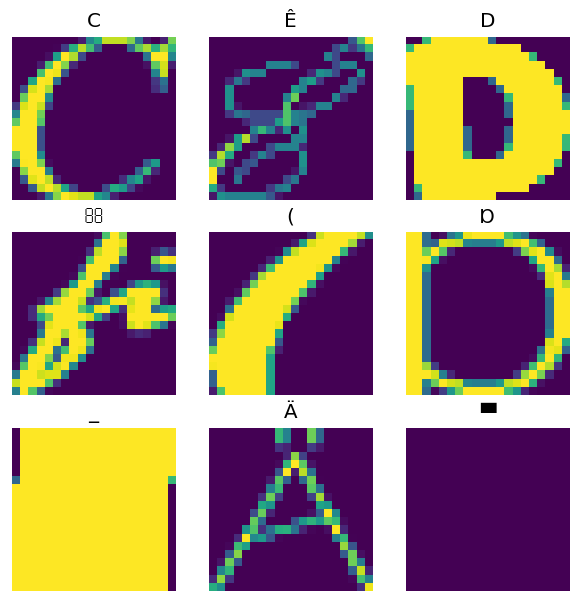

In [124]:
from matplotlib import pyplot as plt

plt.figure(figsize=(6,6), dpi=120)

for n in range(9):
  plt.subplot(3,3,n+1)
  plt.imshow(features['image'][..., n])
  plt.title(chr(features['m_label'][n]))
  plt.axis('off')

In [125]:
text = pathlib.Path(titanic_file_path).read_text()
lines = text.split('\n')[1:-1]

all_strings = [str()]*10
all_strings

['', '', '', '', '', '', '', '', '', '']

In [126]:
features = tf.io.decode_csv(lines, record_defaults=all_strings) 

for f in features:
  print(f"type: {f.dtype.name}, shape: {f.shape}")

type: string, shape: (627,)
type: string, shape: (627,)
type: string, shape: (627,)
type: string, shape: (627,)
type: string, shape: (627,)
type: string, shape: (627,)
type: string, shape: (627,)
type: string, shape: (627,)
type: string, shape: (627,)
type: string, shape: (627,)


In [127]:
print(lines[0])

0,male,22.0,1,0,7.25,Third,unknown,Southampton,n


In [129]:
titanic_types = [int(), str(), float(), int(), int(), float(), str(), str(), str(), str()]
titanic_types

[0, '', 0.0, 0, 0, 0.0, '', '', '', '']

In [130]:
simple_titanic = tf.data.experimental.CsvDataset(titanic_file_path, record_defaults=titanic_types, header=True)

for example in simple_titanic.take(1):
  print([e.numpy() for e in example])

[np.int32(0), b'male', np.float32(22.0), np.int32(1), np.int32(0), np.float32(7.25), b'Third', b'unknown', b'Southampton', b'n']


In [132]:
def decode_titanic_line(line):
  return tf.io.decode_csv(line, titanic_types)

manual_titanic = (
    # Load the lines of text
    tf.data.TextLineDataset(titanic_file_path)
    # Skip the header row.
    .skip(1)
    # Decode the line.
    .map(decode_titanic_line)
)

for example in manual_titanic.take(1):
  print([e.numpy() for e in example])

[np.int32(0), b'male', np.float32(22.0), np.int32(1), np.int32(0), np.float32(7.25), b'Third', b'unknown', b'Southampton', b'n']


Multiple files
To parse the fonts dataset using tf.data.experimental.CsvDataset, you first need to determine the column types for the record_defaults. Start by inspecting the first row of one file:

In [133]:
font_line = pathlib.Path(font_csvs[0]).read_text().splitlines()[1]
print(font_line)

AGENCY,AGENCY FB,64258,0.400000,0,0.000000,35,21,51,22,20,20,1,1,1,21,101,210,255,255,255,255,255,255,255,255,255,255,255,255,255,255,1,1,1,93,255,255,255,176,146,146,146,146,146,146,146,146,216,255,255,255,1,1,1,93,255,255,255,70,1,1,1,1,1,1,1,1,163,255,255,255,1,1,1,93,255,255,255,70,1,1,1,1,1,1,1,1,163,255,255,255,1,1,1,93,255,255,255,70,1,1,1,1,1,1,1,1,163,255,255,255,1,1,1,93,255,255,255,70,1,1,1,1,1,1,1,1,163,255,255,255,1,1,1,93,255,255,255,70,1,1,1,1,1,1,1,1,163,255,255,255,141,141,141,182,255,255,255,172,141,141,141,115,1,1,1,1,163,255,255,255,255,255,255,255,255,255,255,255,255,255,255,209,1,1,1,1,163,255,255,255,6,6,6,96,255,255,255,74,6,6,6,5,1,1,1,1,163,255,255,255,1,1,1,93,255,255,255,70,1,1,1,1,1,1,1,1,163,255,255,255,1,1,1,93,255,255,255,70,1,1,1,1,1,1,1,1,163,255,255,255,1,1,1,93,255,255,255,70,1,1,1,1,1,1,1,1,163,255,255,255,1,1,1,93,255,255,255,70,1,1,1,1,1,1,1,1,163,255,255,255,1,1,1,93,255,255,255,70,1,1,1,1,1,1,1,1,163,255,255,255,1,1,1,93,255,255,255,70,1,1,1,1,1

In [134]:
num_font_features = font_line.count(',')+1
font_column_types = [str(), str()] + [float()]*(num_font_features-2)

In [135]:
font_csvs[0]

'd:\\a27_YEARS_OLD\\deep_learning\\load_preprocess\\fonts_extracted\\AGENCY.csv'

In [136]:
simple_font_ds = tf.data.experimental.CsvDataset(
    font_csvs, 
    record_defaults=font_column_types, 
    header=True)

In [137]:
for row in simple_font_ds.take(10):
  print(row[0].numpy())

b'AGENCY'
b'AGENCY'
b'AGENCY'
b'AGENCY'
b'AGENCY'
b'AGENCY'
b'AGENCY'
b'AGENCY'
b'AGENCY'
b'AGENCY'


In [138]:
font_files = tf.data.Dataset.list_files("fonts/*.csv")


InvalidArgumentError: Expected 'tf.Tensor(False, shape=(), dtype=bool)' to be true. Summarized data: b'No files matched pattern: fonts/*.csv'

In [ ]:
print('Epoch 1:')
for f in list(font_files)[:5]:
  print("    ", f.numpy())
print('    ...')
print()

print('Epoch 2:')
for f in list(font_files)[:5]:
  print("    ", f.numpy())
print('    ...')

In [ ]:
def make_font_csv_ds(path):
  return tf.data.experimental.CsvDataset(
    path, 
    record_defaults=font_column_types, 
    header=True)

In [ ]:
font_rows = font_files.interleave(make_font_csv_ds,
                                  cycle_length=3)

In [ ]:
fonts_dict = {'font_name':[], 'character':[]}

for row in font_rows.take(10):
  fonts_dict['font_name'].append(row[0].numpy().decode())
  fonts_dict['character'].append(chr(int(row[2].numpy())))

pd.DataFrame(fonts_dict)

In [ ]:
BATCH_SIZE=2048
fonts_ds = tf.data.experimental.make_csv_dataset(
    file_pattern = "fonts/*.csv",
    batch_size=BATCH_SIZE, num_epochs=1,
    num_parallel_reads=100)

In [ ]:
%%time
for i,batch in enumerate(fonts_ds.take(20)):
  print('.',end='')

print()

In [ ]:
fonts_files = tf.data.Dataset.list_files("fonts/*.csv")
fonts_lines = fonts_files.interleave(
    lambda fname:tf.data.TextLineDataset(fname).skip(1), 
    cycle_length=100).batch(BATCH_SIZE)

fonts_fast = fonts_lines.map(lambda x: tf.io.decode_csv(x, record_defaults=font_column_types))

In [ ]:
%%time
for i,batch in enumerate(fonts_fast.take(20)):
  print('.',end='')

print()